In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

df = pd.read_csv("shuttle-unsupervised-ad.csv", names=["a",'b','c','d', 'e', 'f' , 'g', 'h', 'i', 'j'])
#df.cols = ["ä",'b','c','d', 'e', 'f' , 'g', 'h', 'i']

df.head()

Using TensorFlow backend.


,a,b,c,d,e,f,g,h,i,j
0,108.0,3.0,109.0,0.0,72.0,7.0,1.0,36.0,36.0,o
1,81.0,0.0,84.0,0.0,-14.0,-2.0,4.0,100.0,96.0,o
2,81.0,0.0,84.0,0.0,-20.0,16.0,4.0,105.0,102.0,o
3,76.0,-1.0,81.0,0.0,-42.0,-3.0,5.0,125.0,120.0,o
4,105.0,0.0,107.0,2.0,70.0,0.0,1.0,37.0,36.0,o


In [2]:
df.j

0        o
1        o
2        o
3        o
4        o
5        o
6        o
7        o
8        o
9        o
10       o
11       o
12       o
13       o
14       o
15       o
16       o
17       o
18       o
19       o
20       o
21       o
22       o
23       o
24       o
25       o
26       o
27       o
28       o
29       o
        ..
46434    n
46435    n
46436    n
46437    n
46438    n
46439    n
46440    n
46441    n
46442    n
46443    n
46444    n
46445    n
46446    n
46447    n
46448    n
46449    n
46450    n
46451    n
46452    n
46453    n
46454    n
46455    n
46456    n
46457    n
46458    n
46459    n
46460    n
46461    n
46462    n
46463    n
Name: j, Length: 46464, dtype: object

In [3]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,a,b,c,d,e,f,g,h,i,j
0,55.0,4.0,83.0,0.0,54.0,0.0,28.0,28.0,0.0,n
1,41.0,0.0,86.0,-5.0,38.0,-7.0,46.0,48.0,2.0,n
2,47.0,1.0,85.0,2.0,46.0,0.0,38.0,39.0,0.0,n
3,48.0,0.0,79.0,3.0,46.0,0.0,31.0,32.0,2.0,n
4,51.0,0.0,84.0,2.0,50.0,-18.0,33.0,35.0,2.0,n


In [4]:
df.j.unique()

array(['n', 'o'], dtype=object)

In [5]:
df.replace('o', 0, inplace=True)
df.replace('n', 1, inplace= True)
df.head()

,a,b,c,d,e,f,g,h,i,j
0,55.0,4.0,83.0,0.0,54.0,0.0,28.0,28.0,0.0,1
1,41.0,0.0,86.0,-5.0,38.0,-7.0,46.0,48.0,2.0,1
2,47.0,1.0,85.0,2.0,46.0,0.0,38.0,39.0,0.0,1
3,48.0,0.0,79.0,3.0,46.0,0.0,31.0,32.0,2.0,1
4,51.0,0.0,84.0,2.0,50.0,-18.0,33.0,35.0,2.0,1


In [6]:
df.tail()


,a,b,c,d,e,f,g,h,i,j
46459,56.0,2.0,84.0,0.0,54.0,-7.0,28.0,30.0,2.0,1
46460,38.0,0.0,82.0,0.0,38.0,2.0,44.0,43.0,0.0,1
46461,43.0,0.0,86.0,0.0,44.0,19.0,42.0,42.0,0.0,1
46462,49.0,1.0,78.0,0.0,50.0,15.0,29.0,29.0,0.0,1
46463,50.0,-2.0,77.0,-1.0,50.0,0.0,28.0,28.0,0.0,1


In [7]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df= pd.DataFrame(x_scaled)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.291667,0.695713,0.484375,0.507015,0.387821,0.457906,0.412214,0.611557,0.572347,1.0
1,0.145833,0.695092,0.507812,0.506371,0.362179,0.457656,0.549618,0.643660,0.575563,1.0
2,0.208333,0.695247,0.500000,0.507272,0.375000,0.457906,0.488550,0.629213,0.572347,1.0
3,0.218750,0.695092,0.453125,0.507401,0.375000,0.457906,0.435115,0.617978,0.575563,1.0
4,0.250000,0.695092,0.492188,0.507272,0.381410,0.457262,0.450382,0.622793,0.575563,1.0


In [9]:
df.rename(columns={ df.columns[9]: 'a'}, inplace = True)
df.head()

,0,1,2,3,4,5,6,7,8,a
0,0.291667,0.695713,0.484375,0.507015,0.387821,0.457906,0.412214,0.611557,0.572347,1.0
1,0.145833,0.695092,0.507812,0.506371,0.362179,0.457656,0.549618,0.643660,0.575563,1.0
2,0.208333,0.695247,0.500000,0.507272,0.375000,0.457906,0.488550,0.629213,0.572347,1.0
3,0.218750,0.695092,0.453125,0.507401,0.375000,0.457906,0.435115,0.617978,0.575563,1.0
4,0.250000,0.695092,0.492188,0.507272,0.381410,0.457262,0.450382,0.622793,0.575563,1.0


In [10]:
RANDOM_SEED = 314
TEST_PCT = 0.2

rcParams['figure.figsize'] = 14, 8.7 
LABELS = ["o","n"]
#col_list = ["cerulean","scarlet"]
#sns.set(style='white', font_scale=1.75, palette=sns.xkcd_palette(col_list))
df.shape

(46464, 10)

In [11]:
df.isnull().values.any()

False

In [12]:
pd.value_counts(df['a'], sort = True)

1.0    45586
0.0      878
Name: a, dtype: int64

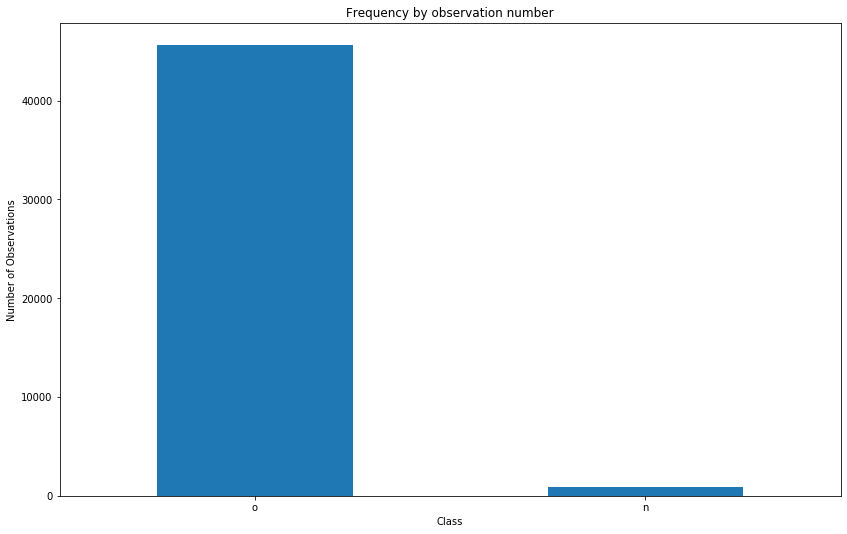

In [13]:
count_classes = pd.value_counts(df['a'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [14]:
normal_df = df[df.a == 0] 
anamolous_df = df[df.a == 1]
y=df['a']
X_train, X_test, y_train, y_test = train_test_split(df[[cols for cols in df.columns if cols != 'a']], y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(37171, 9) (37171,)
(9293, 9) (9293,)


In [15]:
X_train.shape

(37171, 9)

In [16]:
y.unique

<bound method Series.unique of 0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
7        1.0
8        1.0
9        1.0
10       1.0
11       1.0
12       1.0
13       1.0
14       1.0
15       1.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       1.0
22       1.0
23       0.0
24       1.0
25       1.0
26       1.0
27       0.0
28       1.0
29       1.0
        ... 
46434    1.0
46435    1.0
46436    1.0
46437    1.0
46438    1.0
46439    1.0
46440    1.0
46441    1.0
46442    1.0
46443    1.0
46444    1.0
46445    1.0
46446    1.0
46447    1.0
46448    1.0
46449    1.0
46450    1.0
46451    1.0
46452    1.0
46453    1.0
46454    1.0
46455    1.0
46456    1.0
46457    1.0
46458    1.0
46459    1.0
46460    1.0
46461    1.0
46462    1.0
46463    1.0
Name: a, Length: 46464, dtype: float64>

In [17]:
nb_epoch = 20
batch_size = 128
input_dim = X_train.shape[1] #num of columns, 30
encoding_dim = 14
hidden_dim = int(encoding_dim / 2) #i.e. 7
learning_rate = 1e-7

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="autoencoder_edge.h5",save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir=r'C:\Users\Shubham\work\logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[cp, tb]).history

Train on 37171 samples, validate on 9293 samples
Epoch 1/20
37171/37171 [==============================] - 1s 16us/step - loss: 0.1879 - accuracy: 0.0037 - val_loss: 0.1859 - val_accuracy: 0.0041
Epoch 2/20
37171/37171 [==============================] - 0s 11us/step - loss: 0.1856 - accuracy: 0.0055 - val_loss: 0.1854 - val_accuracy: 0.0088
Epoch 3/20
37171/37171 [==============================] - 0s 11us/step - loss: 0.1853 - accuracy: 0.0087 - val_loss: 0.1853 - val_accuracy: 0.0088
Epoch 4/20
37171/37171 [==============================] - 0s 11us/step - loss: 0.1853 - accuracy: 0.0087 - val_loss: 0.1853 - val_accuracy: 0.0088
Epoch 5/20
37171/37171 [==============================] - 0s 11us/step - loss: 0.1716 - accuracy: 0.0084 - val_loss: 0.1568 - val_accuracy: 0.0088
Epoch 6/20
37171/37171 [==============================] - 0s 11us/step - loss: 0.1567 - accuracy: 0.0087 - val_loss: 0.1568 - val_accuracy: 0.0088
Epoch 7/20
37171/37171 [==============================] - 0s 12us/ste

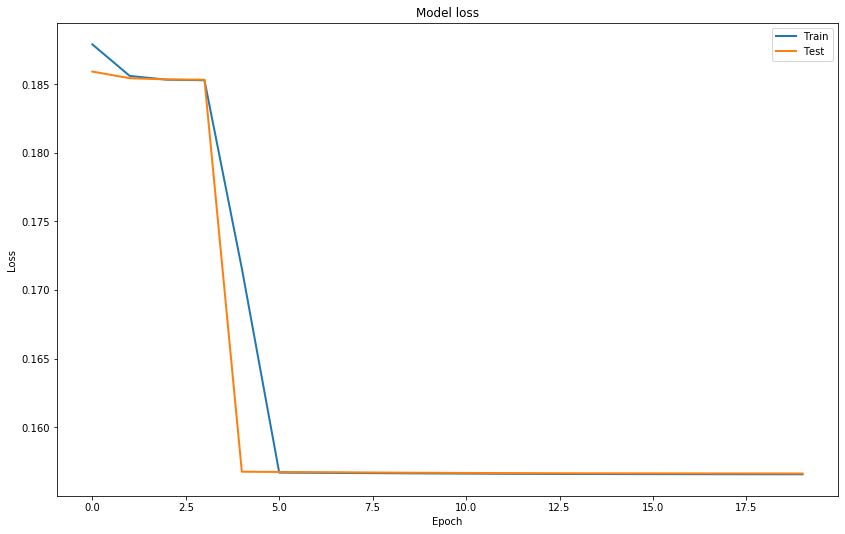

In [18]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [19]:
X_test.iloc[:10].shape

(10, 9)

In [20]:
pre = autoencoder.predict(X_test.iloc[:10])

In [21]:
pre

array([[0.09973942, 0.        , 0.        , 0.5039998 , 0.3582588 ,
        0.45692408, 0.        , 0.        , 0.5752677 ],
       [0.26064578, 0.        , 0.        , 0.5084326 , 0.38474372,
        0.45861527, 0.        , 0.        , 0.57402945],
       [0.10090382, 0.        , 0.        , 0.5041394 , 0.35827547,
        0.4566948 , 0.        , 0.        , 0.5739591 ],
       [0.10283776, 0.        , 0.        , 0.5059335 , 0.34996602,
        0.45733422, 0.        , 0.        , 0.58407545],
       [0.16364679, 0.        , 0.        , 0.5056023 , 0.36761189,
        0.45801708, 0.        , 0.        , 0.57560563],
       [0.1027782 , 0.        , 0.        , 0.5047045 , 0.35461783,
        0.45571345, 0.        , 0.        , 0.5768424 ],
       [0.10702161, 0.        , 0.        , 0.50985754, 0.31849128,
        0.4602055 , 0.        , 0.        , 0.61760557],
       [0.11228769, 0.        , 0.        , 0.5043914 , 0.36204997,
        0.4580393 , 0.        , 0.        , 0.5739713 ],


In [22]:
def classifier(X, y):
    model = RandomForestClassifier(verbose=1) 
    model.fit(X,y)
    return model

In [26]:
mod = classifier(autoencoder.predict(df[[cols for cols in df.columns if cols != 'a']]), y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished


In [27]:
res= mod.predict(autoencoder.predict(df[[cols for cols in df.columns if cols != 'a']]))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [28]:
print(classification_report(res, y))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       877
         1.0       1.00      1.00      1.00     45587

    accuracy                           1.00     46464
   macro avg       1.00      1.00      1.00     46464
weighted avg       1.00      1.00      1.00     46464



In [29]:
set(y)

{0.0, 1.0}

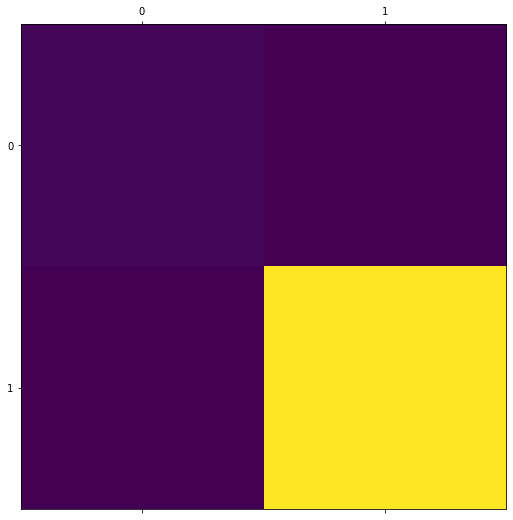

In [30]:
plt.matshow(confusion_matrix(res, y))

In [34]:
df.loc[res==0]

,0,1,2,3,4,5,6,7,8,a
23,0.770833,0.695092,0.632812,0.507272,0.413462,0.457227,0.206107,0.619583,0.623794,0.0
27,0.812500,0.695092,0.664062,0.506243,0.413462,0.457906,0.206107,0.624398,0.630225,0.0
135,0.781250,0.695092,0.640625,0.507659,0.416667,0.458978,0.206107,0.616372,0.620579,0.0
223,0.583333,0.695092,0.515625,0.508045,0.294872,0.457906,0.229008,0.714286,0.713826,0.0
281,0.562500,0.695092,0.500000,0.507015,0.237179,0.458120,0.229008,0.768860,0.768489,0.0
344,0.531250,0.694315,0.476562,0.507015,0.237179,0.457906,0.229008,0.764045,0.765273,0.0
411,0.781250,0.695092,0.640625,0.507015,0.416667,0.458478,0.206107,0.616372,0.620579,0.0
414,0.572917,0.695558,0.507812,0.507272,0.298077,0.457906,0.221374,0.707865,0.707395,0.0
420,0.604167,0.695092,0.523438,0.507015,0.304487,0.458085,0.221374,0.704655,0.704180,0.0
446,0.770833,0.695247,0.632812,0.507659,0.416667,0.458192,0.206107,0.614767,0.617363,0.0
